# Data Preprocessing Template

## Importing the libraries

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [54]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [55]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [56]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Feature scaling

In [57]:
# reshape y into 2D array

y = y.reshape(len(y), 1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [58]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X = sc_x.fit_transform(X)

print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [59]:
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Train SVR Model

In [60]:
from sklearn.svm import SVR
regressor = SVR(kernel="rbf")
regressor.fit(X, y)

/Users/ilya.katz/ws/ml/ml/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predict new result

In [61]:
new_position = 6.5

# scale with the same scale used for X
scaled_position = sc_x.transform([[6.5]])

scaled_predit = regressor.predict(scaled_position)

# reverse the scaling of y (inverse transform)
sc_y.inverse_transform(scaled_predit)

array([170370.0204065])

 
## Visualize SVR Model

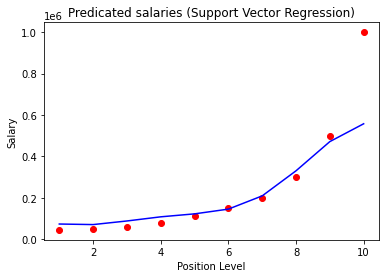

In [62]:
inverse_scaled_x = sc_x.inverse_transform(X)
plt.scatter(inverse_scaled_x, sc_y.inverse_transform(y), color="red")

scaled_predictions = regressor.predict(X)
predictions = sc_y.inverse_transform((scaled_predictions))
plt.plot(inverse_scaled_x, predictions, color="blue")

plt.title("Predicated salaries (Support Vector Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

In [63]:
# Visualize SVR model in higher resolution

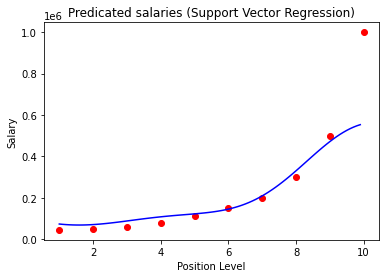

In [64]:
X_inversed = sc_x.inverse_transform((X))
X_grid = np.arange(min(X_inversed), max(X_inversed), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
# print(X_grid)
# X_poly_grid = regressor.fit_transform(X_grid)

inverse_scaled_x = sc_x.inverse_transform(X)
plt.scatter(inverse_scaled_x, sc_y.inverse_transform(y), color="red")

inverse_scaled_x_grid = sc_x.inverse_transform(X_grid)
predictions = regressor.predict(sc_x.transform(X_grid))
inverse_scaled_predictions = sc_y.inverse_transform(predictions)
plt.plot(X_grid, inverse_scaled_predictions, color="blue")

plt.title("Predicated salaries (Support Vector Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

Last value (1M) is an outlier which SVR will not catch